<a href="https://colab.research.google.com/github/saulobw/Optimizador_Cultivos/blob/main/Optimizacion_produccion_agricola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [ ]:
data= pd.read_csv('data.csv')

In [ ]:
print('Tamaño del DataSet:', data.shape)

Tamaño del DataSet: (2200, 8)


In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
#condiciones climaticas promedio para el suelo

print('Promedio de Nitrógeno en el suelo: {0:.2f}'.format(data['N'].mean()))
print('Promedio de Fósforo en el suelo: {0:.2f}'.format(data['P'].mean()))
print('Promedio de Potasio en el suelo: {0:.2f}'.format(data['K'].mean()))
print('Promedio de Temperatura en celsius: {0:.2f}'.format(data['temperature'].mean()))
print('Promedio relativo de Humedad en %: {0:.2f}'.format(data['humidity'].mean()))
print('Valor promedio de PH en el suelo: {0:.2f}'.format(data['ph'].mean()))
print('Promedio de lluvia en mm: {0:.2f}'.format(data['rainfall'].mean()))

Promedio de Nitrógeno en el suelo: 50.55
Promedio de Fósforo en el suelo: 53.36
Promedio de Potasio en el suelo: 48.15
Promedio de Temperatura en celsius: 25.62
Promedio relativo de Humedad en %: 71.48
Valor promedio de PH en el suelo: 6.47
Promedio de lluvia en mm: 103.46


In [ ]:
#condiciones promedio para cada cultivo
@interact
def summary(crops=list(data['label'].value_counts().index)):
  x= data[data['label']==crops]
  print('----------------------------------------------------')
  print('Estadística Nitrógeno')
  print('Mínimo requerido: ',x['N'].min())
  print('Media requerida: ',x['N'].mean())
  print('Máximo requerido: ',x['N'].max())
  print('----------------------------------------------------')
  print('Estadística Fósforo')
  print('Mínimo requerido: ',x['P'].min())
  print('Media requerida: ',x['P'].mean())
  print('Máximo requerido: ',x['P'].max())
  print('----------------------------------------------------')
  print('Estadística Potasio')
  print('Mínimo requerido: ',x['K'].min())
  print('Media requerida: ',x['K'].mean())
  print('Máximo requerido: ',x['K'].max())
  print('----------------------------------------------------')
  print('Estadística Temperatura')
  print('Mínimo requerido: {0:.2f}'.format(x['temperature'].min()))
  print('Media requerida: {0:.2f}'.format(x['temperature'].mean()))
  print('Máximo requerido: {0:.2f}'.format(x['temperature'].max()))
  print('----------------------------------------------------')
  print('Estadística Humedad')
  print('Mínimo requerido: {0:.2f}'.format(x['humidity'].min()))
  print('Media requerida: {0:.2f}'.format(x['humidity'].mean()))
  print('Máximo requerido: {0:.2f}'.format(x['humidity'].max()))
  print('----------------------------------------------------')
  print('Estadística PH')
  print('Mínimo requerido: {0:.2f}'.format(x['ph'].min()))
  print('Media requerida: {0:.2f}'.format(x['ph'].mean()))
  print('Máximo requerido: {0:.2f}'.format(x['ph'].max()))
  print('----------------------------------------------------')
  print('Estadística Precipitacion')
  print('Mínimo ph precipitación: {0:.2f}'.format(x['ph'].min()))
  print('Media ph precipitación: {0:.2f}'.format(x['ph'].mean()))
  print('Máximo ph precipitación: {0:.2f}'.format(x['ph'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [ ]:
#promedio comparativo entre los cultivos y las condiciones
@interact
def compare(conditions= ['N','P','K','temperature','humidity','ph','rainfall']):
  print('Valor promedio para', conditions, 'id{0:.2f}'.format(data[conditions].mean()))
  print('-----------------------------------------------------------------------')
  print('Arroz: {0:.2f}'.format(data[(data['label']=='rice')] [conditions].mean()))
  print('Gramos Negros: {0:.2f}'.format(data[(data['label']=='blackgram')] [conditions].mean()))
  print('Platano: {0:.2f}'.format(data[(data['label']=='banana')] [conditions].mean()))
  print('Yute: {0:.2f}'.format(data[(data['label']=='jute')] [conditions].mean()))
  print('Coco: {0:.2f}'.format(data[(data['label']=='coconut')] [conditions].mean()))
  print('Manzana: {0:.2f}'.format(data[(data['label']=='apple')] [conditions].mean()))
  print('Papaya: {0:.2f}'.format(data[(data['label']=='papaya')] [conditions].mean()))
  print('Melon: {0:.2f}'.format(data[(data['label']=='muskmelon')] [conditions].mean()))
  print('Uvas: {0:.2f}'.format(data[(data['label']=='grapes')] [conditions].mean()))
  print('Sandía: {0:.2f}'.format(data[(data['label']=='watermelon')] [conditions].mean()))
  print('Judias Rojas: {0:.2f}'.format(data[(data['label']=='kidneybeans')] [conditions].mean()))
  print('frijol Mungo: {0:.2f}'.format(data[(data['label']=='mungbean')] [conditions].mean()))
  print('Naranja: {0:.2f}'.format(data[(data['label']=='orange')] [conditions].mean()))
  print('Garbanzos: {0:.2f}'.format(data[(data['label']=='chickpea')] [conditions].mean()))
  print('Lenteja: {0:.2f}'.format(data[(data['label']=='lentil')] [conditions].mean()))
  print('Maiz: {0:.2f}'.format(data[(data['label']=='maize')] [conditions].mean()))
  print('Algodón: {0:.2f}'.format(data[(data['label']=='cotton')] [conditions].mean()))
  print('Mango: {0:.2f}'.format(data[(data['label']=='mango')] [conditions].mean()))
  print('Granada: {0:.2f}'.format(data[(data['label']=='pomegranate')] [conditions].mean()))
  print('Frijoles Moyo: {0:.2f}'.format(data[(data['label']=='mothbeans')] [conditions].mean()))
  print('Gandules: {0:.2f}'.format(data[(data['label']=='pigeonpeas')] [conditions].mean()))
  print('Cafe: {0:.2f}'.format(data[(data['label']=='coffee')] [conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [ ]:
#cultivos que requieren mayor o menor promedio de alguna condicion
@interact
def compare(conditions=['N','P','K','temperature','humidity','ph','rainfall']):
  print('Cultivos que requieren más del promedio', conditions, '\n')
  print(data[data[conditions]>data[conditions].mean()] ['label'].unique())
  print('--------------------------------------------------------')
  print('Cultivos que requieren menos del promedio', conditions, '\n')
  print(data[data[conditions] <= data[conditions].mean()] ['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

#Distribución

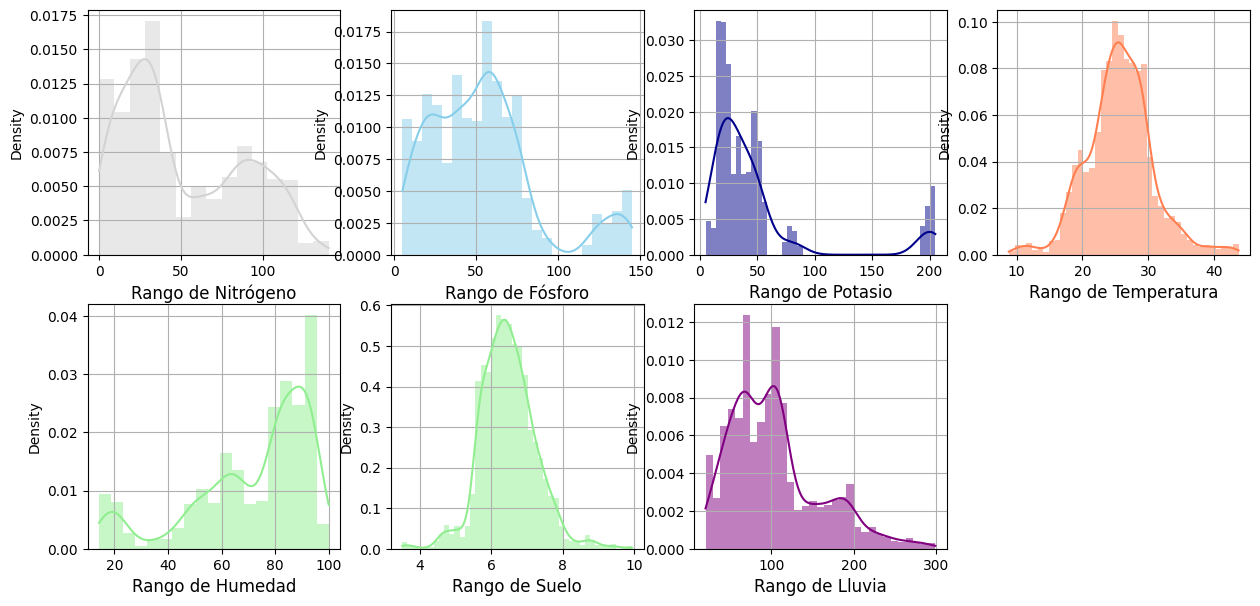

In [ ]:
#buscamos anomalias en los datos

plt.rcParams['figure.figsize']= (15,7)

plt.subplot(2,4,1)
sns.histplot(data['N'], color='lightgrey', kde=True, stat='density', linewidth=0)
plt.xlabel('Rango de Nitrógeno', fontsize=12)
plt.grid()

plt.subplot(2,4,2)
sns.histplot(data['P'], color='skyblue', kde=True, stat='density', linewidth=0)
plt.xlabel('Rango de Fósforo', fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.histplot(data['K'], color='darkblue', kde=True, stat='density', linewidth=0)
plt.xlabel('Rango de Potasio', fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.histplot(data['temperature'], color='coral', kde=True, stat='density', linewidth=0)
plt.xlabel('Rango de Temperatura', fontsize=12)
plt.grid()


plt.subplot(2,4,5)
sns.histplot(data['humidity'], color='lightgreen', kde=True, stat='density', linewidth=0)
plt.xlabel('Rango de Humedad', fontsize=12)
plt.grid()


plt.subplot(2,4,6)
sns.histplot(data['ph'], color='lightgreen', kde=True, stat='density', linewidth=0)
plt.xlabel('Rango de Suelo', fontsize=12)
plt.grid()


plt.subplot(2,4,7)
sns.histplot(data['rainfall'], color='purple', kde=True, stat='density', linewidth=0)
plt.xlabel('Rango de Lluvia', fontsize=12)
plt.grid()

In [ ]:
#cultivos con mayor y menor requirimiento de condiciones
print('Cosechas con mayor o menor requierimento de condiciones')
print('------------------------------------------------------------------------')
print('Mayor requerimiento de Nitrogeno en el suelo', data[data['N']>120] ['label'].unique())
print('Mayor requerimiento de Fósforo en el suelo', data[data['P']>100] ['label'].unique())
print('Mayor requerimiento de Potasio en el suelo', data[data['K']>200] ['label'].unique())
print('Mayor requerimiento de LLuvia/Precipitaciones', data[data['rainfall']>200] ['label'].unique())
print('Mayor rango de Temperatura', data[data['temperature']>40] ['label'].unique())
print('Menor rango de Temperatura', data[data['temperature']<10] ['label'].unique())
print('Menor rango de Humedad', data[data['humidity']<20] ['label'].unique())
print('Menor rango de PH', data[data['ph']<4] ['label'].unique())
print('Mayor rango de PH', data[data['ph']>9] ['label'].unique())

Cosechas con mayor o menor requierimento de condiciones
------------------------------------------------------------------------
Mayor requerimiento de Nitrogeno en el suelo ['cotton']
Mayor requerimiento de Fósforo en el suelo ['grapes' 'apple']
Mayor requerimiento de Potasio en el suelo ['grapes' 'apple']
Mayor requerimiento de LLuvia/Precipitaciones ['rice' 'papaya' 'coconut']
Mayor rango de Temperatura ['grapes' 'papaya']
Menor rango de Temperatura ['grapes']
Menor rango de Humedad ['chickpea' 'kidneybeans']
Menor rango de PH ['mothbeans']
Mayor rango de PH ['mothbeans']


In [ ]:
#cultivos por estaciones
print('Cosecha de verano')
print(data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())
print('------------------------------------------------------------------------')
print('Cosecha invierno')
print(data[(data['temperature']<20) & (data['humidity']>30)]['label'].unique())
print('------------------------------------------------------------------------')
print('Temporada de lluvias')
print(data[(data['rainfall']>200) & (data['humidity']>30)]['label'].unique())

Cosecha de verano
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
------------------------------------------------------------------------
Cosecha invierno
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
------------------------------------------------------------------------
Temporada de lluvias
['rice' 'papaya' 'coconut']


In [ ]:
#clusterizamos los datos de cultivo
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

#cambiamos datos en forma de arreglo numpy
x= data.loc[:,['N','P','K','temperature','ph','humidity','rainfall']].values

print(x.shape)

x_data= pd.DataFrame(x)
x_data.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,6.502985,82.002744,202.935536
1,85.0,58.0,41.0,21.770462,7.038096,80.319644,226.655537
2,60.0,55.0,44.0,23.004459,7.840207,82.320763,263.964248
3,74.0,35.0,40.0,26.491096,6.980401,80.158363,242.864034
4,78.0,42.0,42.0,20.130175,7.628473,81.604873,262.717340


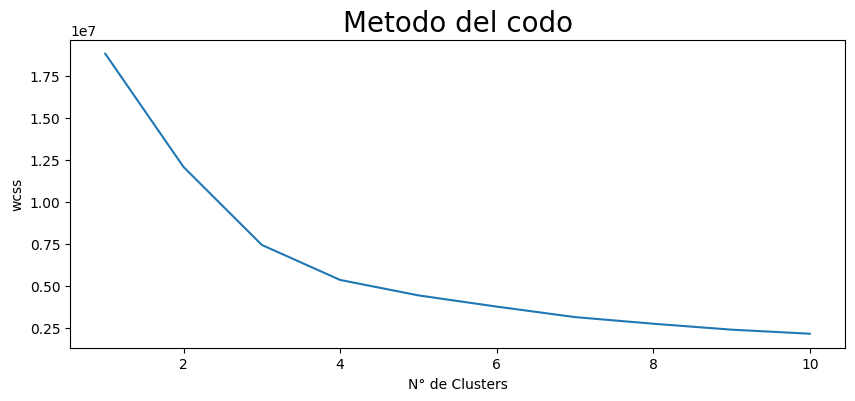

In [ ]:
#determinamos numero de clusters
plt.rcParams['figure.figsize'] = (10,4)

wcss=[]
for i in range(1, 11):
  km= KMeans(n_clusters=i, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
  km.fit(x)
  wcss.append(km.inertia_)


plt.plot(range(1,11), wcss)
plt.title('Metodo del codo', fontsize=20)
plt.xlabel('N° de Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
km= KMeans(n_clusters=4, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
y_means= km.fit_predict(x)

a= data['label']
y_means= pd.DataFrame(y_means)
z= pd.concat([y_means, a], axis=1)
z= z.rename(columns={0:'cluster'})

print('Resusltados despues de aplicar la clusterizacion')
print('Cosechas del primer cluster', z[z['cluster']==0] ['label'].unique())
print('-------------------------------------------------------------------')
print('Cosechas del segundo cluster', z[z['cluster']==1] ['label'].unique())
print('-------------------------------------------------------------------')
print('Cosechas del tercer cluster', z[z['cluster']==2] ['label'].unique())
print('-------------------------------------------------------------------')
print('Cosechas del cuarto cluster', z[z['cluster']==3] ['label'].unique())
print('-------------------------------------------------------------------')

Resusltados despues de aplicar la clusterizacion
Cosechas del primer cluster ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
-------------------------------------------------------------------
Cosechas del segundo cluster ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
-------------------------------------------------------------------
Cosechas del tercer cluster ['grapes' 'apple']
-------------------------------------------------------------------
Cosechas del cuarto cluster ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
-------------------------------------------------------------------


In [ ]:
y=data['label']
x=data.drop(['label'], axis=1)

print('tamaño de x:', x.shape)
print('tamaño de y:', y.shape)

tamaño de x: (2200, 7)
tamaño de y: (2200,)


In [ ]:
#training / testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

print('x train:', x_train.shape)
print('y train', y_train.shape)
print('x_test', x_test.shape)
print('y test', y_test.shape)

x train: (1760, 7)
y train (1760,)
x_test (440, 7)
y test (440,)


In [ ]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)


In [ ]:
#evaluamos rendimiento
from sklearn.metrics import classification_report

cr= classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
#prediccion
prediction= model.predict((np.array([[110,
                                      30,
                                      40,
                                      30,
                                      50,
                                      9,
                                      200]])))

print('El cultivo sugerido para las condiciones climaticas dadas:', prediction)

El cultivo sugerido para las condiciones climaticas dadas: ['coffee']


In [ ]:
import joblib  #guardamos modelo

model_filename= './culPred.pkl'
joblib.dump(model, model_filename)

print("Modelo grabado!")

Modelo grabado!


In [ ]:
model_filename = './culPred.pkl'
model_loaded = joblib.load(model_filename)

print('Modelo Cargado')

Modelo Cargado


In [ ]:
nitrogeno = int(input("Ingrese valor de Nitrogeno: "))
fosforo = int(input("Ingrese valor de Fosforo: "))
potasio = int(input("Ingrese valor de Potasio: "))
temperatura = int(input("Ingrese valor de Temperatura: "))
humedad = int(input("Ingrese valor de Humedad: "))
ph= int(input('Ingrese valor de Ph: '))
lluvia = int(input("Ingrese cantidad de lluvia: "))

# Crear un diccionario de entrada
inputs = {
    'N': [nitrogeno],
    'P': [fosforo],
    'k': [potasio],
    'temperature': [temperatura],
    'ph':[ph],
    'humidity': [humedad],
    'rainfall': [lluvia]
}

# Convertir el diccionario a una matriz 2D usando numpy
input_array = np.array([list(inputs.values())])

# Ajustar la forma de la matriz a 2D
input_array = input_array.reshape(1, -1)

# Usar el modelo para hacer predicciones
predicted_cult = model_loaded.predict(input_array)[0]

print('Segun las siguientes condiciones el cultivo recomendado es: ', predicted_cult)


Ingrese valor de Nitrogeno: 78
Ingrese valor de Fosforo: 45
Ingrese valor de Potasio: 42
Ingrese valor de Temperatura: 25
Ingrese valor de Humedad: 80
Ingrese valor de Ph: 5
Ingrese cantidad de lluvia: 200
Segun las siguientes condiciones el cultivo recomendado es:  coffee
